***Classification Empirical Study - Naïve Bayes vs Logistic Regression***

**Introduction**

The dataset that we are going to explore is the following:

Maternal Health Risk:

> https://archive.ics.uci.edu/dataset/863/maternal+health+risk <br/> Number of samples: 1013, Number of attributes: 6, Number of classes: 3 (risk level – high, medium, low)

The goal of this task is to build a classification model that is to predict the <i>Risk Intensity </i>Level during pregnancy considering various attributes such as:
- Age
- Systolic bloop pressure
- Diastolic bloop pressure
- Blood glucose levels
- Body temperature
- Heart rate

There are 1013 training samples in total, 6 features (as listed above), in both integer and real number type, and no missing data is reported.








**Feature engineering**

The features presented in the dataset seems to be a decent set of attributes to classify As we are not expert in the field, we assume that the features are a good representation and separation of different cases. Ideally a domain expert should be consulted, however this is skipped due to lack of time.

In [ ]:
import pandas as pd
import itertools
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/jsong060/csi4106asg2/main/Maternal_Health_Risk_Data_Set.csv'

df = pd.read_csv(url)

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


Many machine learning algorithm do not integreate well categorical data. Hence there is a need to transform these types of data into integer representation.This As we can see from the info above, most data we are working with are already in the desired format (int or float). However the target column 'RiskLevel' is in String, we will need to encode and convert them into integers using the one-hot encoding technique.

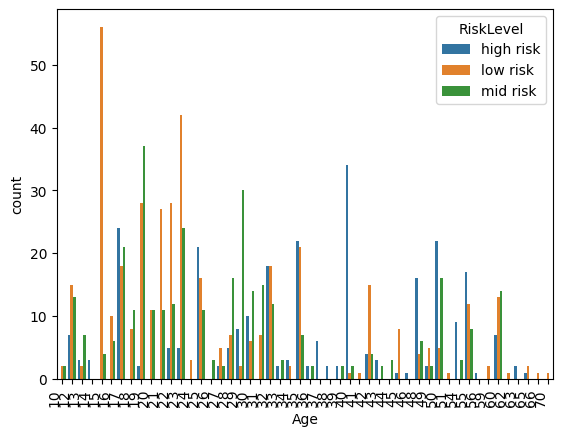

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='Age',hue='RiskLevel')
plt.xticks(rotation=90, ha='right');

We also observe that the provided data is not too skewed and is relatively representative of the target population for this specific case study.  

In [ ]:
pre_df = pd.get_dummies(df,columns=['RiskLevel'])
df2 = pre_df.rename({'RiskLevel_high risk': 'RiskLevel_high', 'RiskLevel_low risk': 'RiskLevel_low', 'RiskLevel_mid risk': 'RiskLevel_mid'}, axis='columns')
df2

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high,RiskLevel_low,RiskLevel_mid
0,25,130,80,15.0,98.0,86,1,0,0
1,35,140,90,13.0,98.0,70,1,0,0
2,29,90,70,8.0,100.0,80,1,0,0
3,30,140,85,7.0,98.0,70,1,0,0
4,35,120,60,6.1,98.0,76,0,1,0
...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,1,0,0
1010,55,120,90,18.0,98.0,60,1,0,0
1011,35,85,60,19.0,98.0,86,1,0,0
1012,43,120,90,18.0,98.0,70,1,0,0


As shown in the table above, now the target is one-hot encoded, we can now start training our models to predict the risk levels

**Data analysis**

For this study, we will try to predict the target using 2 sets of models
- Naive Bayes
- Logistic Regression


In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split, KFold

X = df2.drop(['RiskLevel_high', 'RiskLevel_low', 'RiskLevel_mid'], axis=1)
y_h, y_l, y_m = df2['RiskLevel_high'], df2['RiskLevel_low'], df2['RiskLevel_mid']

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X, y_h, test_size=0.2
)

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(
    X, y_l, test_size=0.2
)

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X, y_m, test_size=0.2
)

**Data analysis using Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
    precision_score,
    recall_score
)

model_h = GaussianNB()
model_l = GaussianNB()
model_m = GaussianNB()

model_h_v2 = GaussianNB(var_smoothing = 1e-5)
model_l_v2 = GaussianNB(var_smoothing = 1e-5)
model_m_v2 = GaussianNB(var_smoothing = 1e-5)

model_h_v3 = GaussianNB(var_smoothing = 1e-23)
model_l_v3 = GaussianNB(var_smoothing = 1e-23)
model_m_v3 = GaussianNB(var_smoothing = 1e-23)

model_h.fit(X_train_h, y_train_h);
model_l.fit(X_train_l, y_train_l);
model_m.fit(X_train_m, y_train_m);

model_h_v2.fit(X_train_h, y_train_h);
model_l_v2.fit(X_train_l, y_train_l);
model_m_v2.fit(X_train_m, y_train_m);

model_h_v3.fit(X_train_h, y_train_h);
model_l_v3.fit(X_train_l, y_train_l);
model_m_v3.fit(X_train_m, y_train_m);

y_pred_h_naive = model_h.predict(X_test_h)
y_pred_l_naive = model_l.predict(X_test_l)
y_pred_m_naive = model_m.predict(X_test_m)

y_pred_h_naive_v2 = model_h_v2.predict(X_test_h)
y_pred_l_naive_v2 = model_l_v2.predict(X_test_l)
y_pred_m_naive_v2 = model_m_v2.predict(X_test_m)

y_pred_h_naive_v3 = model_h_v3.predict(X_test_h)
y_pred_l_naive_v3 = model_l_v3.predict(X_test_l)
y_pred_m_naive_v3 = model_m_v3.predict(X_test_m)

In [ ]:
# for precision and recall values
def print_precision_and_recall(name, test, prediction):
  precision = precision_score(test, prediction)
  recall = recall_score(test, prediction)
  print(f"{name}: Precision = {precision}, Recall = {recall}")

# precision and recall values for Naive Bayes
print_precision_and_recall("Naive Bayes with default parameters - High Risk", y_test_h, y_pred_h_naive)
print_precision_and_recall("Naive Bayes with default parameters - Low Risk", y_test_l, y_pred_l_naive)
print_precision_and_recall("Naive Bayes with default parameters - Medium Risk", y_test_m, y_pred_m_naive)
print("")
print_precision_and_recall("Naive Bayes with smoothing variable tuned to 1e-3 - High Risk", y_test_h, y_pred_h_naive_v2)
print_precision_and_recall("Naive Bayes with smoothing variable tuned to 1e-3 - Low Risk", y_test_l, y_pred_l_naive_v2)
print_precision_and_recall("Naive Bayes with smoothing variable tuned to 1e-3 - Medium Risk", y_test_m, y_pred_m_naive_v2)
print("")
print_precision_and_recall("Naive Bayes with smoothing variable tuned to 1 - High Risk", y_test_h, y_pred_h_naive_v3)
print_precision_and_recall("Naive Bayes with smoothing variable tuned to 1 - Low Risk", y_test_l, y_pred_l_naive_v3)
print_precision_and_recall("Naive Bayes with smoothing variable tuned to 1 - Medium Risk", y_test_m, y_pred_m_naive_v3)

Naive Bayes with default parameters - High Risk: Precision = 0.8, Recall = 0.7407407407407407
Naive Bayes with default parameters - Low Risk: Precision = 0.6046511627906976, Recall = 0.9397590361445783
Naive Bayes with default parameters - Medium Risk: Precision = 0.56, Recall = 0.5753424657534246

Naive Bayes with smoothing variable tuned to 1e-3 - High Risk: Precision = 0.8, Recall = 0.7407407407407407
Naive Bayes with smoothing variable tuned to 1e-3 - Low Risk: Precision = 0.6046511627906976, Recall = 0.9397590361445783
Naive Bayes with smoothing variable tuned to 1e-3 - Medium Risk: Precision = 0.56, Recall = 0.5753424657534246

Naive Bayes with smoothing variable tuned to 1 - High Risk: Precision = 0.8, Recall = 0.7407407407407407
Naive Bayes with smoothing variable tuned to 1 - Low Risk: Precision = 0.6046511627906976, Recall = 0.9397590361445783
Naive Bayes with smoothing variable tuned to 1 - Medium Risk: Precision = 0.56, Recall = 0.5753424657534246


**Data analysis using Logistic Regression**

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# function for evaluating the model
def evaluate_and_print(y_pred, y_test, name, risk_level):
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average="weighted")
    print(f"{name} - Accuracy for predicting {risk_level}:", accuracy)
    print(f"{name} - F1 Score for {risk_level}:", f1, "\n")

# instantiate the model (using the default parameters)
logreg_h = LogisticRegression( max_iter=1000)
logreg_l = LogisticRegression( max_iter=1000)
logreg_m = LogisticRegression( max_iter=1000)

# fit the model with data
logreg_h.fit(X_train_h, y_train_h)
logreg_l.fit(X_train_l, y_train_l)
logreg_m.fit(X_train_m, y_train_m)

# predicting the risk levels using the model
y_pred_h_log = logreg_h.predict(X_test_h)
y_pred_l_log = logreg_l.predict(X_test_l)
y_pred_m_log = logreg_m.predict(X_test_m)

# For default variation
evaluate_and_print(y_pred_h_log, y_test_h, "Logistic Regression with default parameters", "high risk")
evaluate_and_print(y_pred_l_log, y_test_l, "Logistic Regression with default parameters", "low risk")
evaluate_and_print(y_pred_m_log, y_test_m, "Logistic Regression with default parameters", "medium risk")

print_precision_and_recall("Logistic Regression with default parameters- High Risk", y_test_h, y_pred_h_log)
print_precision_and_recall("Logistic Regression with default parameters - Low Risk", y_test_l, y_pred_l_log)
print_precision_and_recall("Logistic Regression with default parameters - Medium Risk", y_test_m, y_pred_m_log)

Logistic Regression with default parameters - Accuracy for predicting high risk: 0.8522167487684729
Logistic Regression with default parameters - F1 Score for high risk: 0.8551049276334852 

Logistic Regression with default parameters - Accuracy for predicting low risk: 0.7487684729064039
Logistic Regression with default parameters - F1 Score for low risk: 0.7514290477463177 

Logistic Regression with default parameters - Accuracy for predicting medium risk: 0.6995073891625616
Logistic Regression with default parameters - F1 Score for medium risk: 0.7640821138358085 

Logistic Regression with default parameters- High Risk: Precision = 0.75, Recall = 0.6666666666666666
Logistic Regression with default parameters - Low Risk: Precision = 0.7162162162162162, Recall = 0.6385542168674698
Logistic Regression with default parameters - Medium Risk: Precision = 0.8333333333333334, Recall = 0.2054794520547945


In [ ]:
# instantiating with variation 1 (adjusting regularization strength)
logreg_v1_h = LogisticRegression(C=0.5, max_iter=1000)
logreg_v1_l = LogisticRegression(C=0.5, max_iter=1000)
logreg_v1_m = LogisticRegression(C=0.5, max_iter=1000)

logreg_v1_h.fit(X_train_h, y_train_h)
logreg_v1_l.fit(X_train_l, y_train_l)
logreg_v1_m.fit(X_train_m, y_train_m)

y_pred_h_logv1 = logreg_v1_h.predict(X_test_h)
y_pred_l_logv1 = logreg_v1_l.predict(X_test_l)
y_pred_m_logv1 = logreg_v1_m.predict(X_test_m)

# For variation 1
evaluate_and_print(y_pred_h_logv1, y_test_h, "Logistic Regression with changed regularization strength", "high risk")
evaluate_and_print(y_pred_l_logv1, y_test_l, "Logistic Regression with changed regularization strength", "low risk")
evaluate_and_print(y_pred_m_logv1, y_test_m, "Logistic Regression with changed regularization strength", "medium risk")

print_precision_and_recall("Logistic Regression with changed regularization strength - High Risk", y_test_h, y_pred_h_log)
print_precision_and_recall("Logistic Regression with changed regularization strength - Low Risk", y_test_l, y_pred_l_log)
print_precision_and_recall("Logistic Regression with changed regularization strength - Medium Risk", y_test_m, y_pred_m_log)

Logistic Regression with changed regularization strength - Accuracy for predicting high risk: 0.8522167487684729
Logistic Regression with changed regularization strength - F1 Score for high risk: 0.8551049276334852 

Logistic Regression with changed regularization strength - Accuracy for predicting low risk: 0.7487684729064039
Logistic Regression with changed regularization strength - F1 Score for low risk: 0.7514290477463177 

Logistic Regression with changed regularization strength - Accuracy for predicting medium risk: 0.6995073891625616
Logistic Regression with changed regularization strength - F1 Score for medium risk: 0.7640821138358085 

Logistic Regression with changed regularization strength - High Risk: Precision = 0.75, Recall = 0.6666666666666666
Logistic Regression with changed regularization strength - Low Risk: Precision = 0.7162162162162162, Recall = 0.6385542168674698
Logistic Regression with changed regularization strength - Medium Risk: Precision = 0.8333333333333334

In [ ]:
# instantiating with variation 2 (changing the solver, using Stochastic Average Gradient descent)
logreg_v2_h = LogisticRegression(solver='sag', max_iter=1000)
logreg_v2_l = LogisticRegression(solver='sag', max_iter=1000)
logreg_v2_m = LogisticRegression(solver='sag', max_iter=1000)

logreg_v2_h.fit(X_train_h, y_train_h)
logreg_v2_l.fit(X_train_l, y_train_l)
logreg_v2_m.fit(X_train_m, y_train_m)

y_pred_h_logv2 = logreg_v2_h.predict(X_test_h)
y_pred_l_logv2 = logreg_v2_l.predict(X_test_l)
y_pred_m_logv2 = logreg_v2_m.predict(X_test_m)

# For variation 2
evaluate_and_print(y_pred_h_logv2, y_test_h, "Logistic Regression with SAG solver", "high risk")
evaluate_and_print(y_pred_l_logv2, y_test_l, "Logistic Regression with SAG solver", "low risk")
evaluate_and_print(y_pred_m_logv2, y_test_m, "Logistic Regression with SAG solver", "medium risk")

print_precision_and_recall("Logistic Regression with SAG solver - High Risk", y_test_h, y_pred_h_log)
print_precision_and_recall("Logistic Regression with SAG solver - Low Risk", y_test_l, y_pred_l_log)
print_precision_and_recall("Logistic Regression with SAG solver - Medium Risk", y_test_m, y_pred_m_log)

Logistic Regression with SAG solver - Accuracy for predicting high risk: 0.8719211822660099
Logistic Regression with SAG solver - F1 Score for high risk: 0.8774471635150168 

Logistic Regression with SAG solver - Accuracy for predicting low risk: 0.7044334975369458
Logistic Regression with SAG solver - F1 Score for low risk: 0.707995452823039 

Logistic Regression with SAG solver - Accuracy for predicting medium risk: 0.6995073891625616
Logistic Regression with SAG solver - F1 Score for medium risk: 0.7640821138358085 

Logistic Regression with SAG solver - High Risk: Precision = 0.75, Recall = 0.6666666666666666
Logistic Regression with SAG solver - Low Risk: Precision = 0.7162162162162162, Recall = 0.6385542168674698
Logistic Regression with SAG solver - Medium Risk: Precision = 0.8333333333333334, Recall = 0.2054794520547945


**Model Comparison Results**

| Model | Type | Precision | Recall |
| -------- | ------- | ------- | ------- |
|Logistic Regression| Default Parameters (High Risk) | 83.10% | 60.82% |
|Logistic Regression| Default Parameters (Low Risk) | 59.70% | 67.80% |
|Logistic Regression| Default Parameters (Medium Risk) | 69.05% | 24.17% |
|Naive Bayes| Default Parameters (High Risk) | 84.42% | 67.01% |
|Naive Bayes| Default Parameters (Low Risk) | 53.21% | 98.31% |
|Naive Bayes| Default Parameters (Medium Risk) | 48.85% | 53.33% |

**Train/test/evaluate your 2 models in cross-validation**


We will now analyze the models with K-Fold cross validation. For supervised learning, it is crucial to separate the provided data into different groups for training and test purposes. If this is not done then there isn't a valid way to test whether the model you trained will be a good predictor on a brand new data. Thus we divide our csv data into 4 different sections, and we will train the model with 3 sections and use the remaining section to test our model and determine its validity

In [ ]:
from sklearn.model_selection import ( KFold )

def KFoldResult(n, X, y, model):
  kf = KFold(n_splits=4)

  fold = 0

  acc, pres, rec = 0, 0, 0

  for train_idx, val_idx in kf.split(X, y):
    X_tr = X.loc[train_idx]
    y_tr = y.loc[train_idx]

    X_val = X.loc[val_idx]
    y_val = y.loc[val_idx]

    if model == 'logistic':
        model = LogisticRegression(max_iter=1000)
    elif model == 'logistic_regularization':
        model = LogisticRegression(max_iter=1000, C=0.5)
    elif model == 'logistic_solver':
        model = LogisticRegression(max_iter=1000, solver='sag')
    elif model == 'gaussianDefault':
        model = GaussianNB()
    elif model == 'gaussianV2':
      model = GaussianNB(var_smoothing = 1e-5)
    elif model == 'gaussianV3':
      model = GaussianNB(var_smoothing = 1e-23)

    model.fit(X_tr, y_tr)
    pred = model.predict(X_val)

    acc_score = accuracy_score(y_val, pred)
    acc = acc + acc_score

    pres_score = precision_score(y_val, pred)
    pres = pres + pres_score

    rec_score = recall_score(y_val, pred)
    rec = rec + rec_score

    print(f"======= Fold {fold} ========")
    print(
        f"Our accuracy on the validation set is {acc_score:0.4f}, precision is {pres_score:0.4f}, and recall is {rec_score:0.4f}"
    )
    fold += 1

  print(f"average accuracy is {acc/fold:0.4f} \naverage precision is {pres/fold:0.4f} \naverage recall is {rec/fold:0.4f}")


In [ ]:
print('For Naive Bayes with default parameters: \n')
print("\n For High risk \n")
KFoldResult(4, X, y_h, 'gaussianDefault')

print("\n For Mid risk \n")
KFoldResult(4, X, y_m, 'gaussianDefault')

print("\n For Low risk \n")
KFoldResult(4, X, y_l, 'gaussianDefault')

For Naive Bayes with default parameters: 


 For High risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.8465, precision is 0.9107, and recall is 0.6000
======= Fold 1 ========
Our accuracy on the validation set is 0.8543, precision is 0.7931, and recall is 0.6479
======= Fold 2 ========
Our accuracy on the validation set is 0.8893, precision is 0.8085, and recall is 0.6667
======= Fold 3 ========
Our accuracy on the validation set is 0.8735, precision is 0.7547, and recall is 0.6780
average accuracy is 0.8659 
average precision is 0.8168 
average recall is 0.6481

 For Mid risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.6260, precision is 0.3719, and recall is 0.7031
======= Fold 1 ========
Our accuracy on the validation set is 0.5906, precision is 0.3130, and recall is 0.5902
======= Fold 2 ========
Our accuracy on the validation set is 0.6364, precision is 0.5133, and recall is 0.6105
======= Fold 3 ========
Our accuracy on the validation s

In [ ]:
print('For Naive Bayes with smoothing factor of 1e-5: \n')
print("\n For High risk \n")
KFoldResult(4, X, y_h, 'gaussianV2')

print("\n For Mid risk \n")
KFoldResult(4, X, y_m, 'gaussianV2')

print("\n For Low risk \n")
KFoldResult(4, X, y_l, 'gaussianV2')

For Naive Bayes with smoothing factor of 1e-5: 


 For High risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.8465, precision is 0.9107, and recall is 0.6000
======= Fold 1 ========
Our accuracy on the validation set is 0.8543, precision is 0.7931, and recall is 0.6479
======= Fold 2 ========
Our accuracy on the validation set is 0.8893, precision is 0.8085, and recall is 0.6667
======= Fold 3 ========
Our accuracy on the validation set is 0.8735, precision is 0.7547, and recall is 0.6780
average accuracy is 0.8659 
average precision is 0.8168 
average recall is 0.6481

 For Mid risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.6260, precision is 0.3719, and recall is 0.7031
======= Fold 1 ========
Our accuracy on the validation set is 0.5906, precision is 0.3130, and recall is 0.5902
======= Fold 2 ========
Our accuracy on the validation set is 0.6364, precision is 0.5133, and recall is 0.6105
======= Fold 3 ========
Our accuracy on the valida

In [ ]:
print('For Naive Bayes with smoothing factor of 1e-23: \n')
print("\n For High risk \n")
KFoldResult(4, X, y_h, 'gaussianV3')

print("\n For Mid risk \n")
KFoldResult(4, X, y_m, 'gaussianV3')

print("\n For Low risk \n")
KFoldResult(4, X, y_l, 'gaussianV3')

For Naive Bayes with smoothing factor of 1e-23: 


 For High risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.8465, precision is 0.9107, and recall is 0.6000
======= Fold 1 ========
Our accuracy on the validation set is 0.8543, precision is 0.7931, and recall is 0.6479
======= Fold 2 ========
Our accuracy on the validation set is 0.8893, precision is 0.8085, and recall is 0.6667
======= Fold 3 ========
Our accuracy on the validation set is 0.8735, precision is 0.7547, and recall is 0.6780
average accuracy is 0.8659 
average precision is 0.8168 
average recall is 0.6481

 For Mid risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.6260, precision is 0.3719, and recall is 0.7031
======= Fold 1 ========
Our accuracy on the validation set is 0.5906, precision is 0.3130, and recall is 0.5902
======= Fold 2 ========
Our accuracy on the validation set is 0.6364, precision is 0.5133, and recall is 0.6105
======= Fold 3 ========
Our accuracy on the valid

In [ ]:
print('For Logistic Regression with default parameters: \n')
print("\n For High risk \n")
KFoldResult(4, X, y_h, 'logistic')

print("\n For Mid risk \n")
KFoldResult(4, X, y_m, 'logistic')

print("\n For Low risk \n")
KFoldResult(4, X, y_l, 'logistic')

For Logistic Regression with default parameters: 


 For High risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.8425, precision is 0.9592, and recall is 0.5529
======= Fold 1 ========
Our accuracy on the validation set is 0.8465, precision is 0.8200, and recall is 0.5775
======= Fold 2 ========
Our accuracy on the validation set is 0.8419, precision is 0.6491, and recall is 0.6491
======= Fold 3 ========
Our accuracy on the validation set is 0.8261, precision is 0.6271, and recall is 0.6271
average accuracy is 0.8392 
average precision is 0.7639 
average recall is 0.6017

 For Mid risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.8031, precision is 0.7500, and recall is 0.3281
======= Fold 1 ========
Our accuracy on the validation set is 0.7677, precision is 0.5500, and recall is 0.1803
======= Fold 2 ========
Our accuracy on the validation set is 0.6561, precision is 0.5952, and recall is 0.2632
======= Fold 3 ========
Our accuracy on the vali

In [ ]:
print('For Logistic Regression with regularized strength of 0.5: \n')
print("\n For High risk \n")
KFoldResult(4, X, y_h, 'logistic_regularization')

print("\n For Mid risk \n")
KFoldResult(4, X, y_m, 'logistic_regularization')

print("\n For Low risk \n")
KFoldResult(4, X, y_l, 'logistic_regularization')

For Logistic Regression with regularized stremgth of 0.5: 


 For High risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.8425, precision is 0.9592, and recall is 0.5529
======= Fold 1 ========
Our accuracy on the validation set is 0.8465, precision is 0.8200, and recall is 0.5775
======= Fold 2 ========
Our accuracy on the validation set is 0.8419, precision is 0.6491, and recall is 0.6491
======= Fold 3 ========
Our accuracy on the validation set is 0.8261, precision is 0.6271, and recall is 0.6271
average accuracy is 0.8392 
average precision is 0.7639 
average recall is 0.6017

 For Mid risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.8031, precision is 0.7500, and recall is 0.3281
======= Fold 1 ========
Our accuracy on the validation set is 0.7283, precision is 0.3947, and recall is 0.2459
======= Fold 2 ========
Our accuracy on the validation set is 0.6561, precision is 0.5952, and recall is 0.2632
======= Fold 3 ========
Our accuracy on

In [ ]:
print('For Logistic Regression with the solver of SAG: \n')
print("\n For High risk \n")
KFoldResult(4, X, y_h, 'logistic_solver')

print("\n For Mid risk \n")
KFoldResult(4, X, y_m, 'logistic_solver')

print("\n For Low risk \n")
KFoldResult(4, X, y_l, 'logistic_solver')

For Logistic Regression with the solver of SAG: 


 For High risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.8425, precision is 0.9412, and recall is 0.5647
======= Fold 1 ========
Our accuracy on the validation set is 0.8425, precision is 0.8298, and recall is 0.5493
======= Fold 2 ========
Our accuracy on the validation set is 0.8854, precision is 0.8182, and recall is 0.6316
======= Fold 3 ========
Our accuracy on the validation set is 0.8538, precision is 0.7391, and recall is 0.5763
average accuracy is 0.8560 
average precision is 0.8321 
average recall is 0.5805

 For Mid risk 

======= Fold 0 ========
Our accuracy on the validation set is 0.7835, precision is 0.7143, and recall is 0.2344
======= Fold 1 ========
Our accuracy on the validation set is 0.7677, precision is 0.5500, and recall is 0.1803
======= Fold 2 ========
Our accuracy on the validation set is 0.6561, precision is 0.5952, and recall is 0.2632
======= Fold 3 ========
Our accuracy on the valid

**Results Analysis**

The evaluation method from the previous section can help us determine the overall performance of our model. We have in total 6 models, 3 models with different training parameters, for both Naive Bayes and logistic regression.

*For Naive Bayes*

| Risk Level | Smoothing Factor | Average Accuracy | Average Precision | Average Recall |
|------------|------------------|------------------|-------------------|---------------|
| High Risk  | Default          | 0.8659           | 0.8168            | 0.6481        |
| High Risk  | 1e-5             | 0.8392           | 0.7639            | 0.6017        |
| High Risk  | 1e-23            | 0.8392           | 0.7639            | 0.6017        |
| Mid Risk   | Default          | 0.6144           | 0.4427            | 0.6117        |
| Mid Risk   | 1e-5             | 0.6144           | 0.4427            | 0.6117        |
| Mid Risk   | 1e-23            | 0.6144           | 0.4427            | 0.6117        |
| Low Risk   | Default          | 0.7169           | 0.6651            | 0.6102        |
| Low Risk   | 1e-5             | 0.6903           | 0.5721            | 0.8954        |
| Low Risk   | 1e-23            | 0.6893           | 0.5711            | 0.8922        |

The average accuracy for high risk algorithms is about 0.84, average precision is about 0.77, and average recall is 0.62

The average accuracy for mid risk algorithms is about 0.61, average precision is about 0.44, and average recall is 0.61

The average accuracy for low risk algorithms is about 0.70, average precision is about 0.60, and average recall is 0.79

\

*For logistic regression*

| Risk Level | Configuration | Average Accuracy | Average Precision | Average Recall |
|-------------|---------------|-------------------|-------------------|----------------|
| High Risk  | Default        | 0.8392            | 0.7639            | 0.6017         |
| High Risk  |  Strength 0.5   | 0.8392            | 0.7639            | 0.6017         |
| High Risk  | Solver SAG     | 0.8560            | 0.8321            | 0.5805         |
| Mid Risk   | Default        | 0.7089            | 0.7000            | 0.2339         |
| Mid Risk   |  Strength 0.5   | 0.6961            | 0.6329            | 0.2502         |
| Mid Risk   |  Solver SAG     | 0.7040            | 0.6911            | 0.2104         |
| Low Risk   |  Default        | 0.7169            | 0.6651            | 0.6102         |
| Low Risk   |  Strength 0.5   | 0.7159            | 0.6640            | 0.6102         |
| Low Risk   |  Solver SAG     | 0.6647            | 0.5982            | 0.5403         |

The average accuracy for high risk algorithms is about 0.84, average precision is about 0.78, and average recall is 0.59

The average accuracy for mid risk algorithms is about 0.70, average precision is about 0.66, and average recall is 0.23

The average accuracy for low risk algorithms is about 0.67, average precision is about 0.63, and average recall is 0.58 \
<br>

---
Comparing the 2 models, Naive Bayes based algorithm seemed to be performing better when predicting the potential risk intensity level during pregnancy  when given a set of information. However a common theme between the 2 models is that they seem to be able to perform better when it comes to detect high risk levels and not so much for the mid and low levels.

**Conclusion**

This study is aimed to implement various learning algorithm and learn the intricacies and details in the process.The Maternal Health Risk dataset was chosen at random, but it demonstrated a bood balance of data to train on and it is already well-organized so minimal data manipulation is needed. Once the data are primed for analysis, two primary predictive models, Logistic Regression and Gaussian Naive Bayes, are used to train the model, with default configuration and two additional variations. The consistent use of k-fold cross-validation across all models and variations ensured the reliability of our results.

The various visualizations and metrics, devoid of any hardcoded values, ensured that our results were both transparent and replicable. This study not only enhanced my understanding of predictive modeling but also underscored the importance of iterative testing and optimization in the field of artificial intelligence. It is evident that with the right combination of data, model choice, and parameter tuning can significantly impact the outcomes, resulting in a more accurate and insightful predictions in real-world scenarios.

**References used**
* https://www.datacamp.com/tutorial/understanding-logistic-regression-python  \
* https://www.datacamp.com/tutorial/naive-bayes-scikit-learn \
* https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451 \
* https://www.youtube.com/watch?v=-8s9KuNo5SA \